In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline
import json

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthikvajja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# with open("chitchat.json", "r") as write_file:
#     data = json.load(write_file)
# # data["a07edb12-6b91-4138-b11e-02421888d699"]["messages"][0]
# cctext = []
# for i in data["a07edb12-6b91-4138-b11e-02421888d699"]["messages"]:
#   cctext.append(i[0]['text'])
# # print(cctext)
# label = [0 for o in range(len(cctext))]
# dataset = pd.DataFrame({'text':cctext,'category':label})
# print(len(dataset))
# import pickle
# #Add files to list here
# l = ['Education', 'politics', 'ChangeMyView', 'ExplainLikeImFive', 'FoodForThought', 'Healthcare', 'Technology', 'TodayILearned']
# text = []
# #Path to folder
# path = 'data/'
# for i in l:
#   count = 0
#   with open(path + i + '.pkl', 'rb') as f:
#     data = pickle.load(f)
#     label = [1 for o in range(len(data))]
#     temp_dataset = pd.DataFrame({'text':data['body'].values,'category':label})
#     dataset = pd.concat([dataset, temp_dataset.iloc[:5,:]])
# print(len(dataset)-35)
#     # print(data['body'])
# print(dataset.head())

35
40
                                                text  category
0                                              Hello         0
1                                        whats up MD         0
2  Im alright, I just took a nap. But it was one ...         0
3                                        oh wow haha         0
4                                               Yeah         0


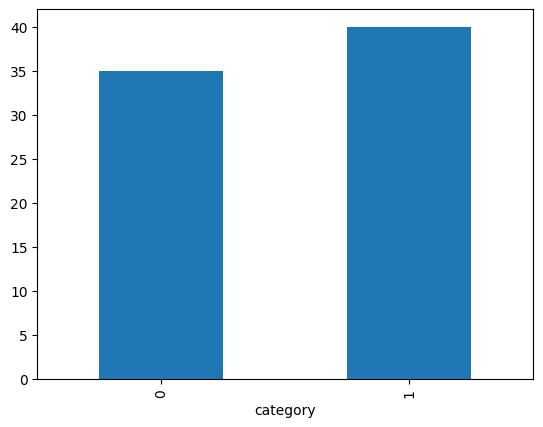

In [24]:
# dataset.groupby('category').text.count().plot.bar(ylim=0)
# plt.show()

In [25]:
# nltk.download('stopwords')
# stemmer = PorterStemmer()
# words = stopwords.words("english")
# dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthikvajja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# dataset.head()

text  category  \
0                                              Hello         0   
1                                        whats up MD         0   
2  Im alright, I just took a nap. But it was one ...         0   
3                                        oh wow haha         0   
4                                               Yeah         0   

                                             cleaned  
0                                              hello  
1                                            what md  
2  im alright i took nap but one nap doesnt help ...  
3                                        oh wow haha  
4                                               yeah

In [27]:
# vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
# final_features = vectorizer.fit_transform(dataset['text']).toarray()
# # final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
# final_features.shape

(75, 18)

In [28]:
# from sklearn.linear_model import LogisticRegression
# X = dataset['text']
# # X = dataset['cleaned']
# Y = dataset['category']
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# pipeline = Pipeline([('vect', vectorizer),
#                      ('chi',  SelectKBest(chi2, k='all')),
#                      ('clf', LogisticRegression(random_state=0))])

# model = pipeline.fit(X_train, y_train)
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

# ytest = np.array(y_test)

# # confusion matrix and classification report(precision, recall, F1-score)
# print(classification_report(ytest, model.predict(X_test)))
# print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.50      0.80      0.62        10

    accuracy                           0.47        19
   macro avg       0.42      0.46      0.39        19
weighted avg       0.42      0.47      0.40        19

[[1 8]
 [2 8]]


In [61]:
import os
cctext = []
for filename in os.listdir('datasets-CMU_DoG-master/Conversations/train/'):
   with open('datasets-CMU_DoG-master/Conversations/train/' + filename, 'r') as f:
      data = json.load(f)
      for entry in data['history']:
         cctext.append(entry['text'])
for filename in os.listdir('datasets-CMU_DoG-master/Conversations/test/'):
   with open('datasets-CMU_DoG-master/Conversations/test/' + filename, 'r') as f:
      data = json.load(f)
      for entry in data['history']:
         cctext.append(entry['text'])
for filename in os.listdir('datasets-CMU_DoG-master/Conversations/valid/'):
   with open('datasets-CMU_DoG-master/Conversations/valid/' + filename, 'r') as f:
      data = json.load(f)
      for entry in data['history']:
         cctext.append(entry['text'])
label = [0 for o in range(len(cctext))]
dataset = pd.DataFrame({'text':cctext,'category':label})

dataset = dataset.iloc[:30000,:]

le=len(dataset)
import pickle
#Add files to list here
l = ['Education', 'politics', 'ChangeMyView', 'ExplainLikeImFive', 'FoodForThought', 'Healthcare', 'Technology', 'TodayILearned']
text = []
#Path to folder
path = 'data/'
for i in l:
  count = 0
  with open(path + i + '.pkl', 'rb') as f:
    data = pickle.load(f)
    label = [1 for o in range(len(data))]
    temp_dataset = pd.DataFrame({'text':data['body'].values,'category':label})
    dataset = pd.concat([dataset, temp_dataset.iloc[:4000,:]])
print(len(dataset)-le)
    # print(data['body'])
print(dataset.head())

32000
                                                text  category
0                                                 hi         0
1                                              hello         0
2                              what about this movie         0
3  not sure haven't received the document yet. di...         0
4                                                yes         0


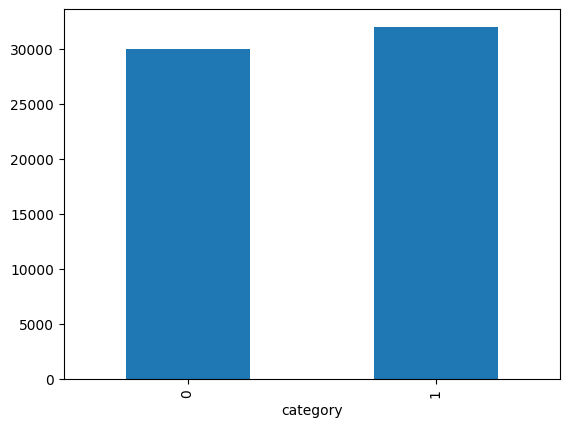

In [62]:
dataset.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [63]:
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthikvajja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
# final_features = vectorizer.fit_transform(dataset['text']).toarray()
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
# final_features.shape


In [65]:
from sklearn.linear_model import LogisticRegression
# X = dataset['text']
X = dataset['cleaned']
Y = dataset['category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k='all')),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7476
           1       0.90      0.89      0.90      8024

    accuracy                           0.89     15500
   macro avg       0.89      0.89      0.89     15500
weighted avg       0.89      0.89      0.89     15500

[[6698  778]
 [ 875 7149]]


In [66]:
y_new = ['Hello! How are you doing?']

vectorizer_new = TfidfVectorizer()
X = vectorizer_new.fit_transform(y_new)
print(model.predict(y_new))


[0]


In [67]:
# model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [68]:
model.predict(['you think prove point explain woefulli ignor'])

array([1])

In [76]:
model.predict(['global warming'])

array([1])

In [69]:
import pickle
pickle.dump(model, open('dtc_classifier1.pkl', 'wb'))

In [72]:
for i in dataset['cleaned']:
    print(i)

hi
hello
movi
sure receiv document yet
ye

movi name byron howard rich moor
guess may
dont know name raj
zootopia

va

indian
countri
usa
hello
i good
have seen movi
veri good thank ask
do know name movi
i see inform screen
batman vs superman
no seen yet
i time
it okay best superhero movi ok
what think
i know much film
i think ben affleck good batman best part
stori kind medicor
edit bad well the stori could good batman fight superman doesnt work well could
ben affleck good actor play superman
henri cavil english actor he bad honestli
it seem like mani superhero movi day
bad edit stori line
yeah i want good yeah hot mess good thing lot
how one rate becaus usual rate highli end big disappoint
it percent rotten tomoto
aww good
metacrit
good
i consid let teen kid watch i think would like especi i know rate low
well extend cut certain blu ray make movi way better
realli
edit better delet scene i would watch
ye
much better
i might check
batman vs superman not great score rotten tomato cinem